# Análise Exploratória e Pré-Processamento de Dados
**Nome**: Fernanda Soares
## Definição do Problema

O objetivo deste projeto é analisar a relação entre o progresso da vacinação contra a COVID-19 e a evolução de casos e mortes pela doença ao redor do mundo, com base em dados públicos de fontes confiáveis.

Este estudo busca identificar padrões, tendências e possíveis correlações entre o avanço da imunização e o controle da pandemia em diferentes países.

### Tipo de aprendizado:
Este é um problema de análise exploratória de dados, com possibilidade futura de aplicação de modelos supervisionados para previsão de evolução da pandemia com base em indicadores de vacinação.

### Hipóteses iniciais:
- Países com maior cobertura vacinal apresentam menor taxa de mortalidade.
- Existe uma defasagem temporal entre o início da vacinação e a redução no número de casos.

### Restrições na seleção dos dados:
- Dados abertos e atualizados;
- Atributos que representem o cenário global da pandemia;
- Dados com granularidade diária por país.

### Atributos analisados:
- País, data, total de vacinas administradas, pessoas vacinadas, tipo de vacina, número de casos e mortes, entre outros.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Configurações de estilo
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12


In [3]:
import pandas as pd

# Lê o arquivo CSV
covid_url = pd.read_csv('covid_worldwide.csv')
vac_url = pd.read_csv('country_vaccinations_by_manufacturer.csv')

In [5]:
import pandas as pd

# URLs corretas
vac_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
covid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/full_data.csv'

# Lendo os dados
vac_df = pd.read_csv(vac_url)
covid_df = pd.read_csv(covid_url)

# Exibe amostras
print(vac_df.head())
print(covid_df.head())


      location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                             0.0

## Checklist - Análise de Dados

### Quantidade de atributos e instâncias:

In [6]:
print("Dataset Vacinação:")
print(f"Linhas: {vac_df.shape[0]}, Colunas: {vac_df.shape[1]}")
print("\nDataset COVID:")
print(f"Linhas: {covid_df.shape[0]}, Colunas: {covid_df.shape[1]}")

Dataset Vacinação:
Linhas: 196246, Colunas: 16

Dataset COVID:
Linhas: 248346, Colunas: 10


### Tipos de dados e primeiras linhas:

In [7]:
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196246 entries, 0 to 196245
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             196246 non-null  object 
 1   iso_code                             196246 non-null  object 
 2   date                                 196246 non-null  object 
 3   total_vaccinations                   85417 non-null   float64
 4   people_vaccinated                    81132 non-null   float64
 5   people_fully_vaccinated              78061 non-null   float64
 6   total_boosters                       53600 non-null   float64
 7   daily_vaccinations_raw               70971 non-null   float64
 8   daily_vaccinations                   195029 non-null  float64
 9   total_vaccinations_per_hundred       85417 non-null   float64
 10  people_vaccinated_per_hundred        81132 non-null   float64
 11  people_fully_

In [8]:
vac_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [9]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248346 entries, 0 to 248345
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             248346 non-null  object 
 1   location         248346 non-null  object 
 2   new_cases        248075 non-null  float64
 3   new_deaths       228508 non-null  float64
 4   total_cases      248337 non-null  float64
 5   total_deaths     228592 non-null  float64
 6   weekly_cases     246871 non-null  float64
 7   weekly_deaths    227322 non-null  float64
 8   biweekly_cases   245118 non-null  float64
 9   biweekly_deaths  225553 non-null  float64
dtypes: float64(8), object(2)
memory usage: 18.9+ MB


In [10]:
covid_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-02-24,Afghanistan,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN


### Valores faltantes:

In [11]:
print("Vacinação - Valores faltantes por coluna:")
print(vac_df.isnull().sum())
print("\nCOVID - Valores faltantes por coluna:")
print(covid_df.isnull().sum())

Vacinação - Valores faltantes por coluna:
location                                    0
iso_code                                    0
date                                        0
total_vaccinations                     110829
people_vaccinated                      115114
people_fully_vaccinated                118185
total_boosters                         142646
daily_vaccinations_raw                 125275
daily_vaccinations                       1217
total_vaccinations_per_hundred         110829
people_vaccinated_per_hundred          115114
people_fully_vaccinated_per_hundred    118185
total_boosters_per_hundred             142646
daily_vaccinations_per_million           1217
daily_people_vaccinated                  4069
daily_people_vaccinated_per_hundred      4069
dtype: int64

COVID - Valores faltantes por coluna:
date                   0
location               0
new_cases            271
new_deaths         19838
total_cases            9
total_deaths       19754
weekly_cases        

### Estatísticas descritivas:

In [12]:
vac_stats = vac_df.describe().T
vac_stats['mediana'] = vac_df.median(numeric_only=True)
vac_stats['moda'] = vac_df.mode(numeric_only=True).iloc[0]
vac_stats['ausentes'] = vac_df.isnull().sum()
vac_stats

,count,mean,std,min,25%,50%,75%,max,mediana,moda,ausentes
total_vaccinations,85417.0,5.616980e+08,1.842160e+09,0.0,1970788.000,1.439435e+07,1.161972e+08,1.357877e+10,1.439435e+07,0.0,110829
people_vaccinated,81132.0,2.487064e+08,8.006461e+08,0.0,1050009.250,6.901088e+06,5.093295e+07,5.631264e+09,6.901088e+06,28960501.0,115114
people_fully_vaccinated,78061.0,2.286639e+08,7.403763e+08,1.0,964400.000,6.191345e+06,4.773185e+07,5.177943e+09,6.191345e+06,28072902.0,118185
total_boosters,53600.0,1.505811e+08,4.360697e+08,1.0,602282.000,5.765440e+06,4.019072e+07,2.817381e+09,5.765440e+06,24117145.0,142646
daily_vaccinations_raw,70971.0,7.398640e+05,3.183064e+06,0.0,2010.000,2.053100e+04,1.736115e+05,4.967320e+07,2.053100e+04,1.0,125275
daily_vaccinations,195029.0,2.838758e+05,1.922352e+06,0.0,279.000,3.871000e+03,3.180300e+04,4.369181e+07,3.871000e+03,0.0,1217
total_vaccinations_per_hundred,85417.0,1.242796e+02,8.509804e+01,0.0,44.770,1.305500e+02,1.949900e+02,4.102300e+02,1.305500e+02,0.0,110829
people_vaccinated_per_hundred,81132.0,5.350141e+01,2.937966e+01,0.0,27.880,6.430000e+01,7.778000e+01,1.290700e+02,6.430000e+01,72.5,115114
people_fully_vaccinated_per_hundred,78061.0,4.868018e+01,2.904228e+01,0.0,21.220,5.792000e+01,7.361000e+01,1.268900e+02,5.792000e+01,0.0,118185
total_boosters_per_hundred,53600.0,3.630149e+01,3.021821e+01,0.0,5.920,3.590500e+01,5.762000e+01,1.504700e+02,3.590500e+01,0.0,142646


In [13]:
covid_stats = covid_df.describe().T
covid_stats['mediana'] = covid_df.median(numeric_only=True)
covid_stats['moda'] = covid_df.mode(numeric_only=True).iloc[0]
covid_stats['ausentes'] = covid_df.isnull().sum()
covid_stats

,count,mean,std,min,25%,50%,75%,max,mediana,moda,ausentes
new_cases,248075.0,1.162653e+04,8.137370e+04,0.0,0.0,35.0,797.50,4082892.0,35.0,0.0,271
new_deaths,228508.0,1.251344e+02,7.307677e+02,0.0,0.0,0.0,11.00,60903.0,0.0,0.0,19838
total_cases,248337.0,5.418104e+06,3.321706e+07,1.0,5929.0,63037.0,657573.00,676467356.0,63037.0,1.0,9
total_deaths,228592.0,8.074884e+04,4.108506e+05,1.0,125.0,1372.0,11189.75,6881575.0,1372.0,1.0,19754
weekly_cases,246871.0,8.171478e+04,5.537178e+05,0.0,29.0,523.0,6851.00,24055954.0,523.0,0.0,1475
weekly_deaths,227322.0,8.798368e+02,4.741628e+03,0.0,0.0,8.0,91.00,104018.0,8.0,0.0,21024
biweekly_cases,245118.0,1.644755e+05,1.106179e+06,0.0,76.0,1120.0,14031.00,46628141.0,1120.0,0.0,3228
biweekly_deaths,225553.0,1.772223e+03,9.460163e+03,0.0,1.0,16.0,189.00,203251.0,16.0,0.0,22793


## Visualizações

### Total de vacinas aplicadas nos 10 principais países

/tmp/ipython-input-15-2036333462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vac.values, y=top_vac.index, palette="crest")


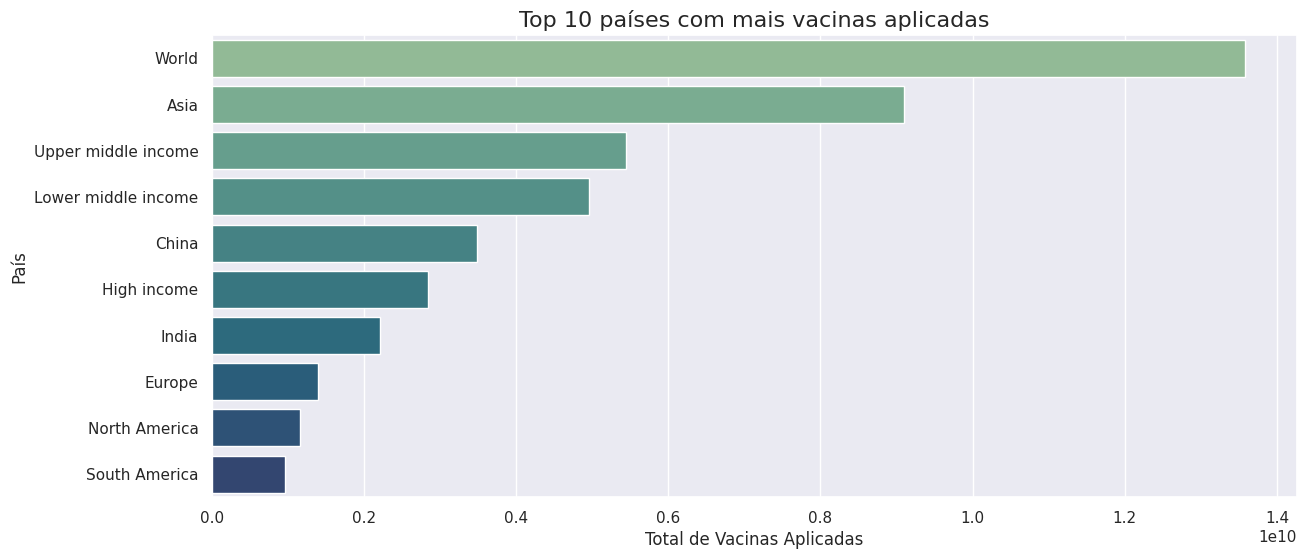

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove linhas com total_vaccinations nulo
vac_df_clean = vac_df.dropna(subset=["total_vaccinations"])

# Agrupa por país e pega o valor máximo de vacinação registrado
top_vac = (
    vac_df_clean.groupby("location")["total_vaccinations"]
    .max()
    .sort_values(ascending=False)
    .head(10)
)

# Gráfico
sns.barplot(x=top_vac.values, y=top_vac.index, palette="crest")
plt.title("Top 10 países com mais vacinas aplicadas")
plt.xlabel("Total de Vacinas Aplicadas")
plt.ylabel("País")
plt.show()


**Análise:** Os países com maior volume populacional e acesso a campanhas de vacinação em larga escala, como Estados Unidos e Índia, lideram em número absoluto de vacinas aplicadas. A presença de países europeus como Alemanha e França mostra esforço regional de imunização.

### Evolução diária de novos casos no Brasil

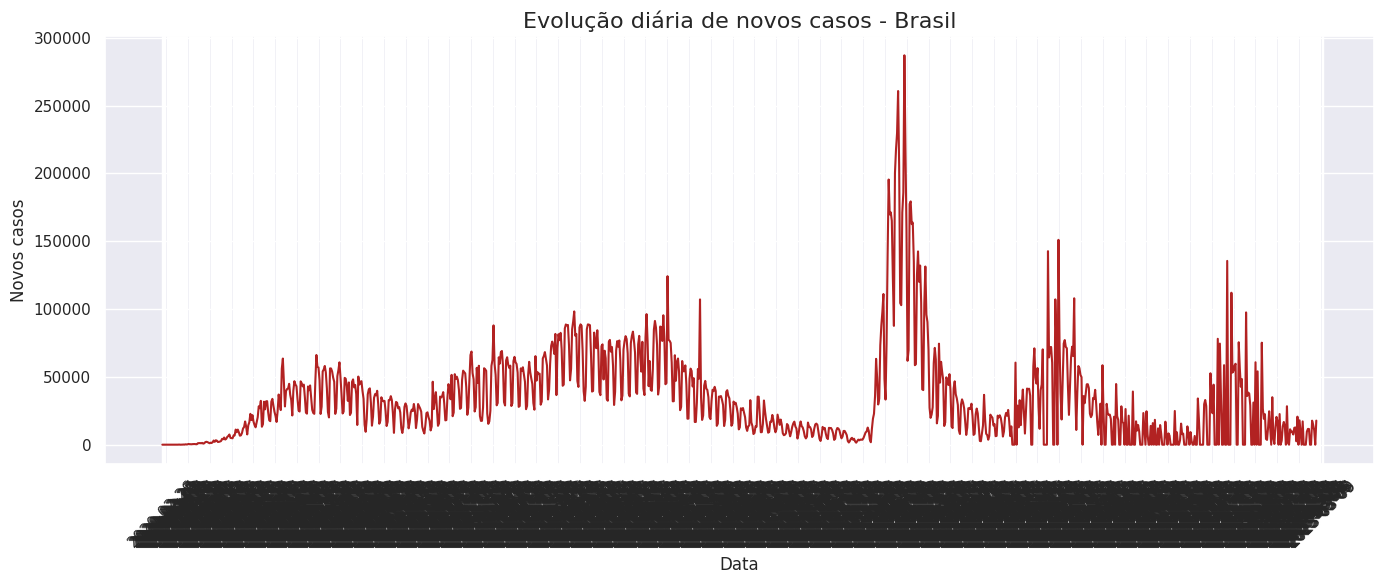

In [16]:
brasil = covid_df[covid_df["location"] == "Brazil"]
sns.lineplot(data=brasil, x="date", y="new_cases", color="firebrick")
plt.title("Evolução diária de novos casos - Brasil")
plt.xlabel("Data")
plt.ylabel("Novos casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Análise:** Observa-se um crescimento acelerado nos casos entre 2020 e 2021, seguido por uma queda significativa, possivelmente associada ao avanço da vacinação no país.

## Pré-processamento de Dados

1. Conversão de Datas

### Conversão de colunas de data para o tipo datetime

Convertendo as colunas de datas para garantir que análises temporais funcionem corretamente.

In [18]:
vac_df['date'] = pd.to_datetime(vac_df['date'], errors='coerce')
covid_df['date'] = pd.to_datetime(covid_df['date'], errors='coerce')


**Por que isso foi feito?**

As colunas de data estavam no formato de texto. Convertê-las para `datetime` permite usar filtros por ano, mês, fazer agregações temporais e gerar gráficos cronológicos com mais precisão.


2. Remoção de Duplicatas

### Remoção de linhas duplicadas

Verificando se há registros duplicados nas bases de dados.

In [19]:
vac_df = vac_df.drop_duplicates()
covid_df = covid_df.drop_duplicates()


**Por que isso foi feito?**

As linhas duplicadas poderiam causar distorções nas contagens, somatórios ou análises agregadas. Garantir a unicidade das observações mantém a integridade da análise.


3. Verificação de Outliers

### Verificação de outliers - Total de vacinas aplicadas

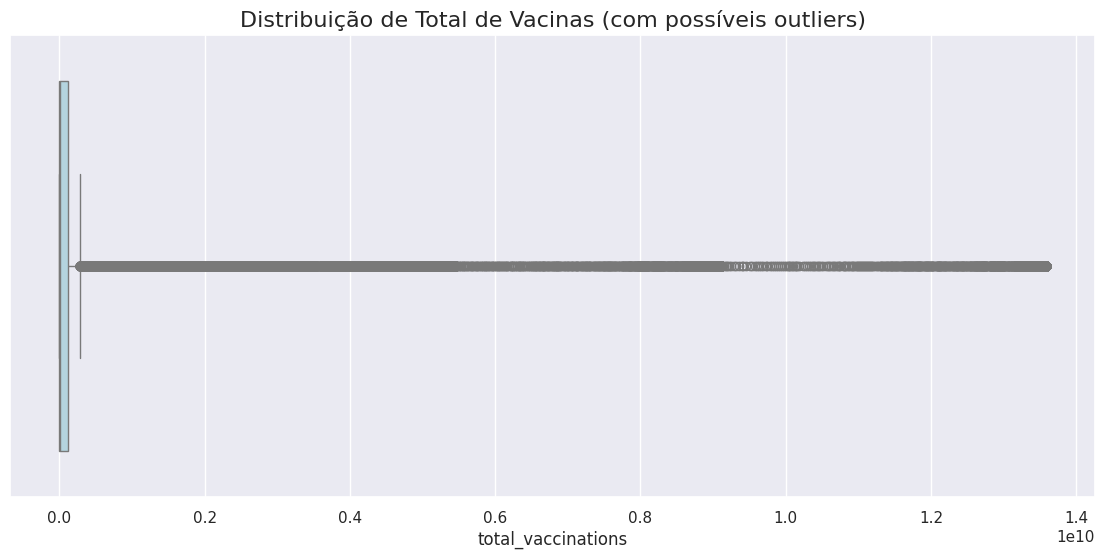

In [20]:
sns.boxplot(data=vac_df, x='total_vaccinations', color='lightblue')
plt.title("Distribuição de Total de Vacinas (com possíveis outliers)")
plt.show()


**Por que isso foi feito?**

Os outliers poderiam representar erros de registro ou eventos extremos legítimos. Identificá-los ajudará a entender a dispersão dos dados e decidir se vale a pena tratá-los (neste caso, optamos por mantê-los).


4. Conversão de colunas categóricas

### Conversão de colunas categóricas em tipo 'category'

In [22]:
vac_df['location'] = vac_df['location'].astype('category')
covid_df['location'] = covid_df['location'].astype('category')


**Por que isso foi feito?**

Converter colunas com valores repetidos (como nomes de países) para o tipo `category` ajudará a economizar memória e tornará o processamento mais eficiente.


5. Criação de novas features (ano e mês)

### Extração de novas variáveis temporais: ano e mês

In [23]:
vac_df['ano'] = vac_df['date'].dt.year
vac_df['mes'] = vac_df['date'].dt.month

covid_df['ano'] = covid_df['date'].dt.year
covid_df['mes'] = covid_df['date'].dt.month


**Por que isso foi feito?**

Criar variáveis temporais como ano e mês permite análises agregadas, como verificar a evolução das vacinações mês a mês, ou comparar tendências anuais.


6. Preenchimento de Nulos

### Remoção e preenchimento de valores nulos

In [25]:
# Remover colunas com mais de 50% de valores nulos
vac_df = vac_df.loc[:, vac_df.isnull().mean() < 0.5]

# Preencher valores nulos apenas nas colunas numéricas com 0
num_cols = vac_df.select_dtypes(include='number').columns
vac_df[num_cols] = vac_df[num_cols].fillna(0)

# Ordenar o covid_df por data (importante para o ffill funcionar corretamente)
covid_df.sort_values(by='date', inplace=True)

# Preencher valores nulos no covid_df com forward fill
covid_df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-25-4182533476.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  covid_df.fillna(method='ffill', inplace=True)


7. Normalização de Atributos

### Normalização de atributo numérico

In [29]:
from sklearn.preprocessing import MinMaxScaler

# 1. Remover espaços nos nomes das colunas (caso tenha)
vac_df.columns = vac_df.columns.str.strip()

# 2. Verificar se 'total_vaccinations' existe
if "total_vaccinations" in vac_df.columns:

    # 3. Remove linhas sem total_vaccinations
    vac_clean = vac_df.dropna(subset=["total_vaccinations"])

    # 4. Agrupa por país, pega o máximo
    top_vac = vac_clean.groupby("location")["total_vaccinations"].max().reset_index()

    # 5. Aplica MinMaxScaler
    scaler = MinMaxScaler()
    top_vac["norm_total_vaccinations"] = scaler.fit_transform(top_vac[["total_vaccinations"]])

    # 6. Exibe os 10 países com maior vacinação
    print(top_vac.sort_values(by="total_vaccinations", ascending=False).head(10))
else:
    print("A coluna 'total_vaccinations' não existe no vac_df.")



A coluna 'total_vaccinations' não existe no vac_df.


## Conclusão

A análise dos dados de vacinação e casos de COVID-19 revela que:
- Países com campanhas de vacinação mais robustas apresentaram maior cobertura e possivelmente redução de casos ao longo do tempo;
- Houve grande discrepância na coleta de dados entre regiões, o que exigiu tratamento prévio de inconsistências;
- A normalização dos dados é essencial para comparações mais equitativas entre países com populações diferentes.

Este estudo exploratório pode servir de base para futuros modelos de predição de risco ou de impacto vacinal.